In [14]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve, auc
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://www.tensorflow.org/datasets/catalog/mnist

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to plot the distribution of labels in the dataset
def plot_label_distribution(labels, dataset_name):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title(f'{dataset_name} Label Distribution')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


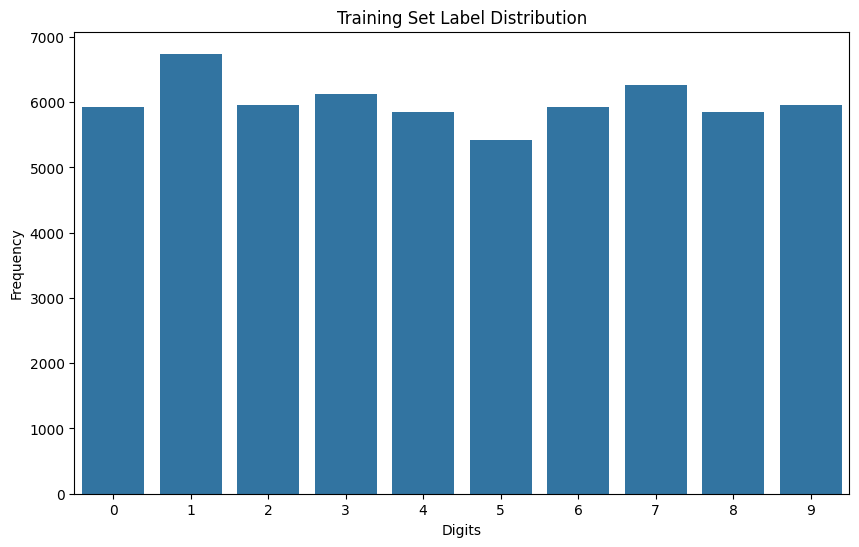

In [5]:
# Plot the distribution for training and test sets
plot_label_distribution(train_labels, 'Training Set')

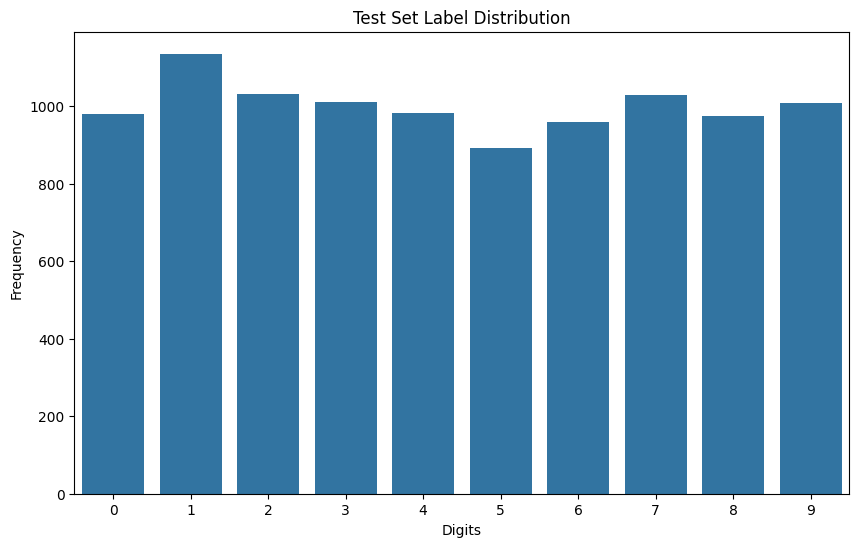

In [6]:
plot_label_distribution(test_labels, 'Test Set')

In [7]:
# Function to show random sample images from the dataset
def show_random_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 4))
    indices = np.random.choice(np.arange(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

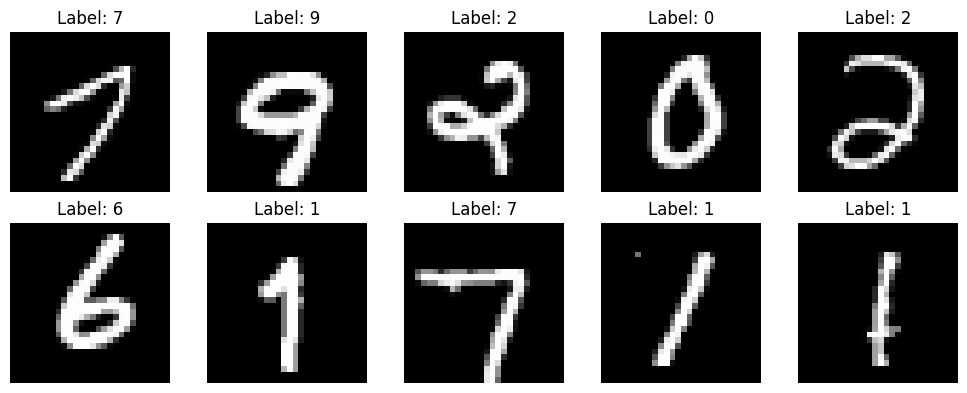

In [8]:
# Show some random sample images from the training set
show_random_images(train_images, train_labels)

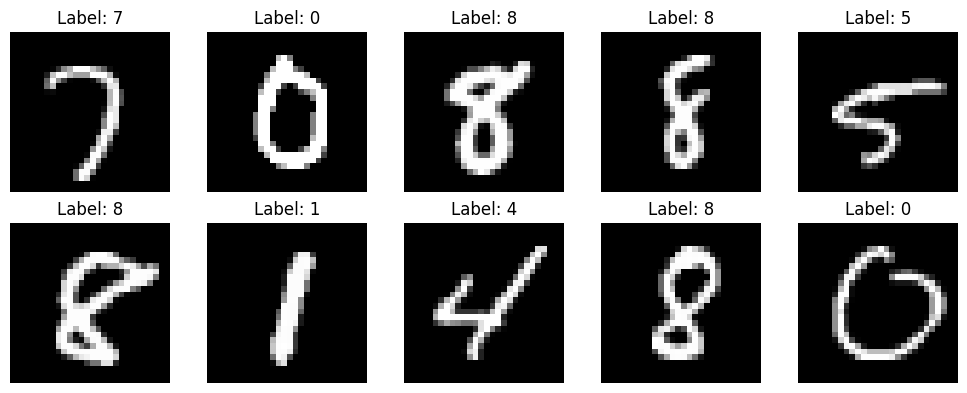

In [10]:
# Show some random sample images from the training set
show_random_images(test_images, test_labels)

Matrix Representation of Digit 4:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  25  50   0   0
    0   0   0   0  57 255 126   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 178 247  25   0
    0   0   0   0 106 254 159   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  26 239 199   7   0
    0   0   0  35 228 242  60   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  17 196 254  67   0   0
    0   0   0 148 254 225   0   0   0   0]
 [  0   0   0   0   0   0   0 

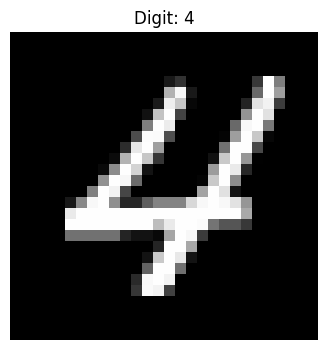

In [11]:
# Function to show the matrix representation of a single image
def show_matrix_representation(image, label):
    print(f'Matrix Representation of Digit {label}:')
    print(image)

    # Visualize the matrix representation
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f'Digit: {label}')
    plt.axis('off')
    plt.show()

# Display the matrix representation of a single image
random_idx = np.random.randint(0, len(train_images))
show_matrix_representation(train_images[random_idx], train_labels[random_idx])

In [12]:
# Preprocessing: Reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [15]:
# Define the LeNet-5 architecture
model = models.Sequential()

# C1: Convolutional Layer (6 filters of size 5x5, stride 1)
model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))

# S2: Subsampling Layer (Average Pooling with size 2x2, stride 2)
model.add(layers.AveragePooling2D((2, 2), strides=2))

# C3: Convolutional Layer (16 filters of size 5x5)
model.add(layers.Conv2D(16, (5, 5), activation='tanh'))

# S4: Subsampling Layer (Average Pooling with size 2x2, stride 2)
model.add(layers.AveragePooling2D((2, 2), strides=2))

# C5: Fully Connected Convolutional Layer (120 filters of size 1x1) # Changed filter size to 1x1
model.add(layers.Conv2D(120, (1, 1), activation='tanh'))

# Flatten the output to feed into fully connected layers
model.add(layers.Flatten())

# F6: Fully Connected Layer with 84 units
model.add(layers.Dense(84, activation='tanh'))

# Output layer: 10 units (for 10 classes in MNIST), softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 120)           │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │         161,364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,826 (651.66 KB)

 Trainable params: 166,826 (651.66 KB)

 Non-trainable params: 0 (0.00 B)

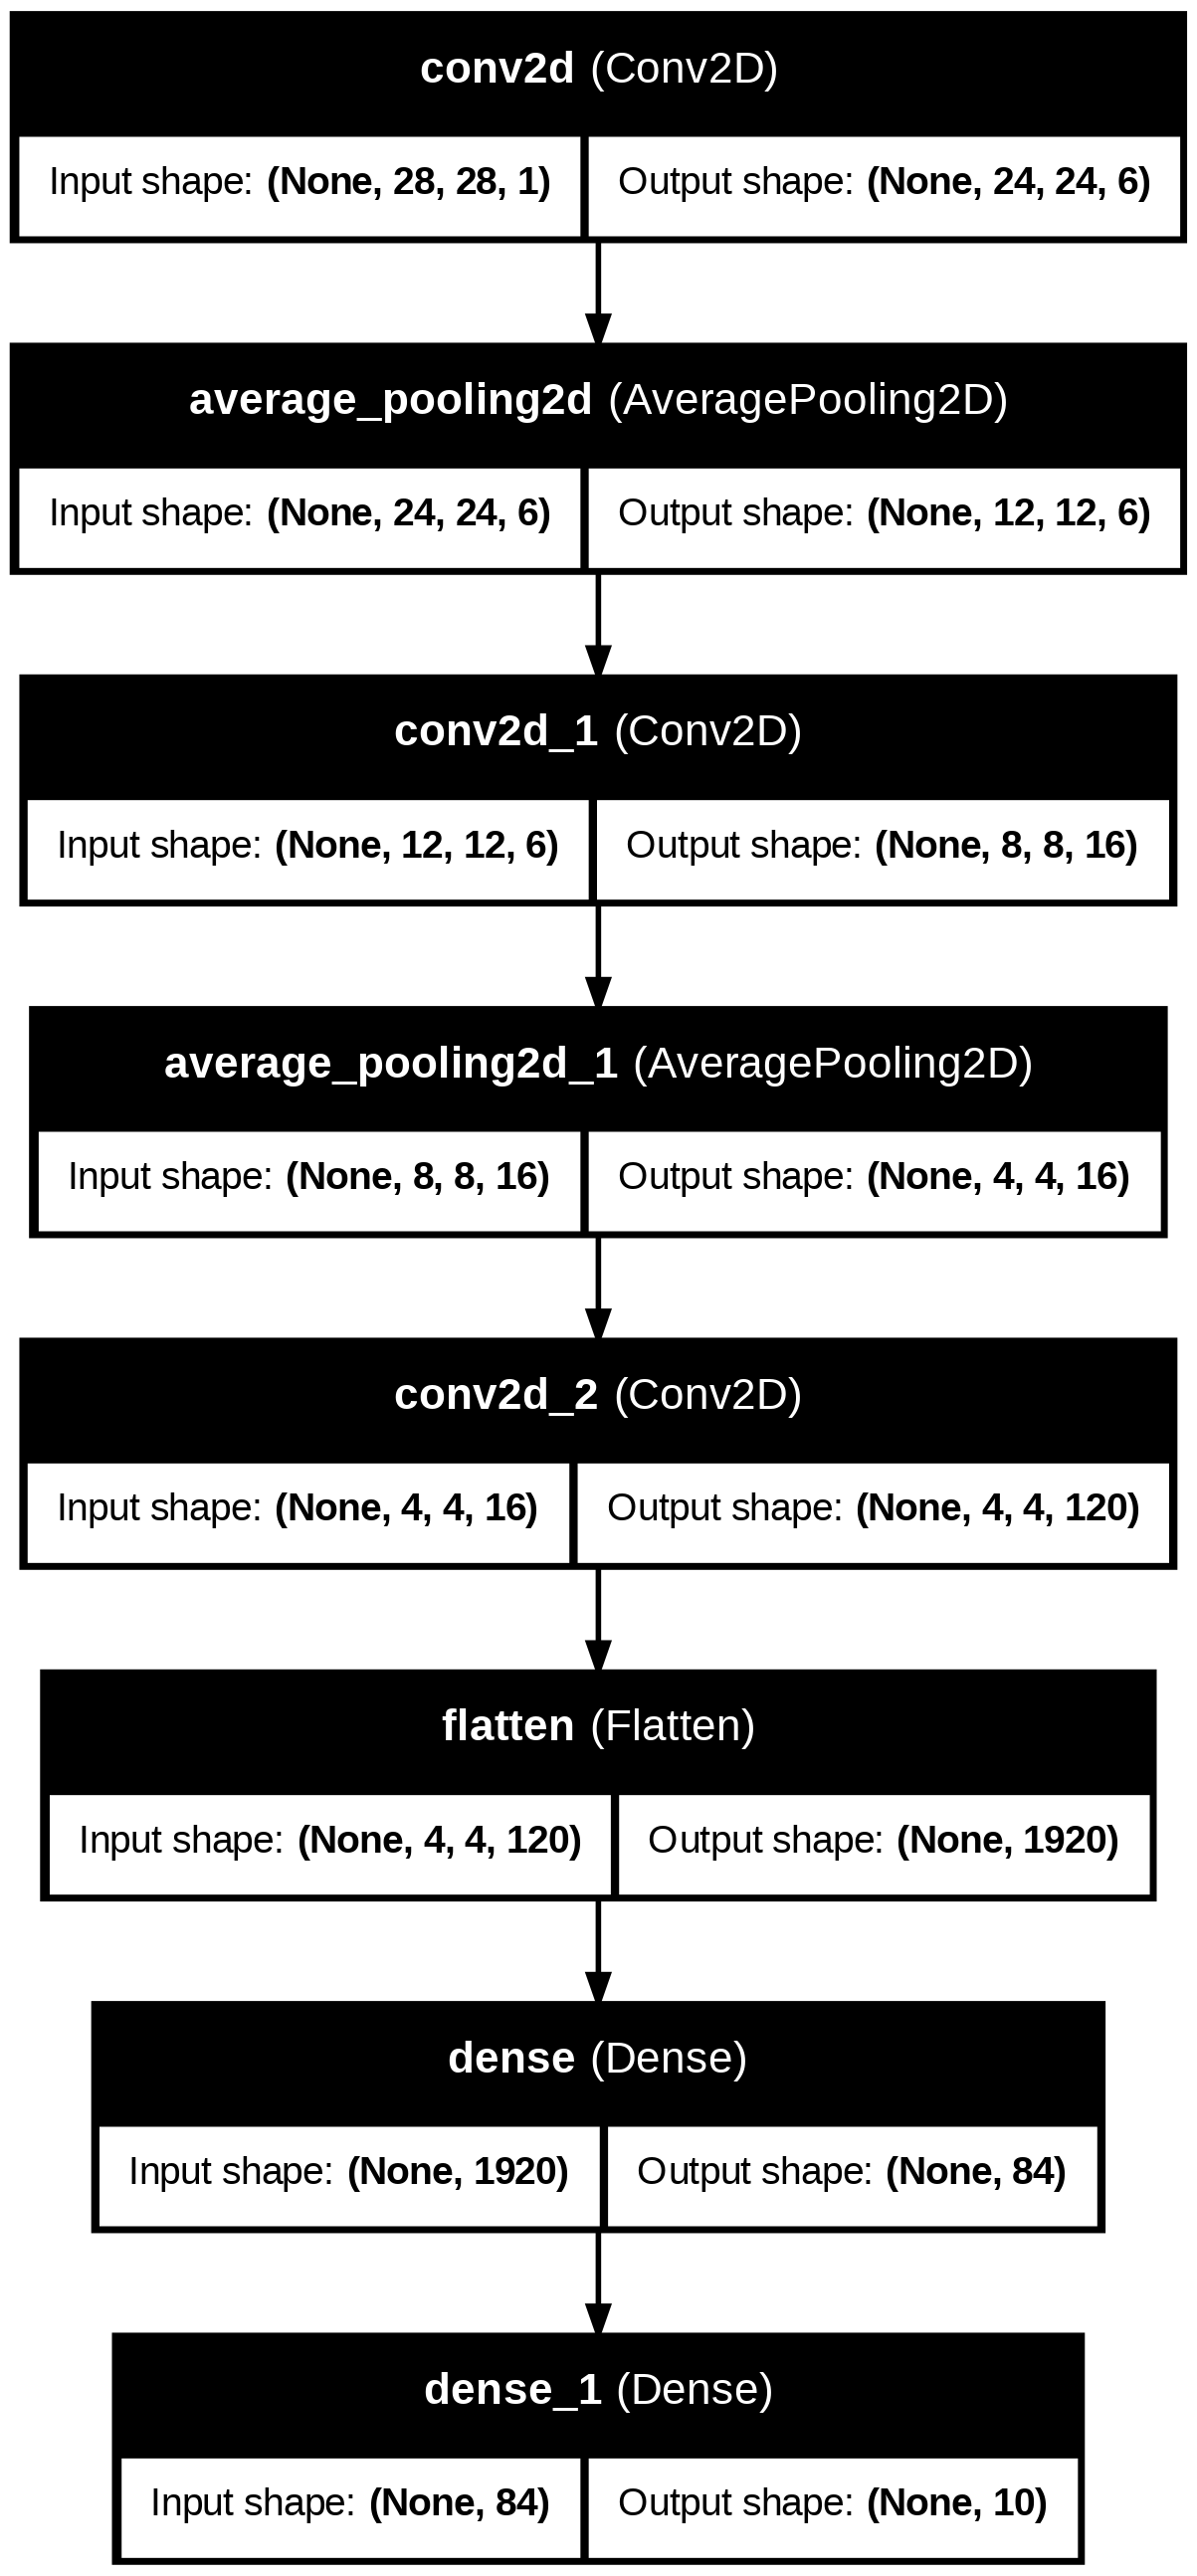

In [16]:
# Create the plot of the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
# Train the model
history = model.fit(
    train_images,
    train_labels_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
    )

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.8609 - loss: 0.4827 - val_accuracy: 0.9581 - val_loss: 0.1542
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.9594 - loss: 0.1381 - val_accuracy: 0.9707 - val_loss: 0.0971
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.9750 - loss: 0.0836 - val_accuracy: 0.9778 - val_loss: 0.0747
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9824 - loss: 0.0613 - val_accuracy: 0.9811 - val_loss: 0.0634
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9874 - loss: 0.0432 - val_accuracy: 0.9837 - val_loss: 0.0581
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9822 - val_loss: 0.0563
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9844 - val_loss: 0.0556
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.9920 - loss: 0.0252 - 

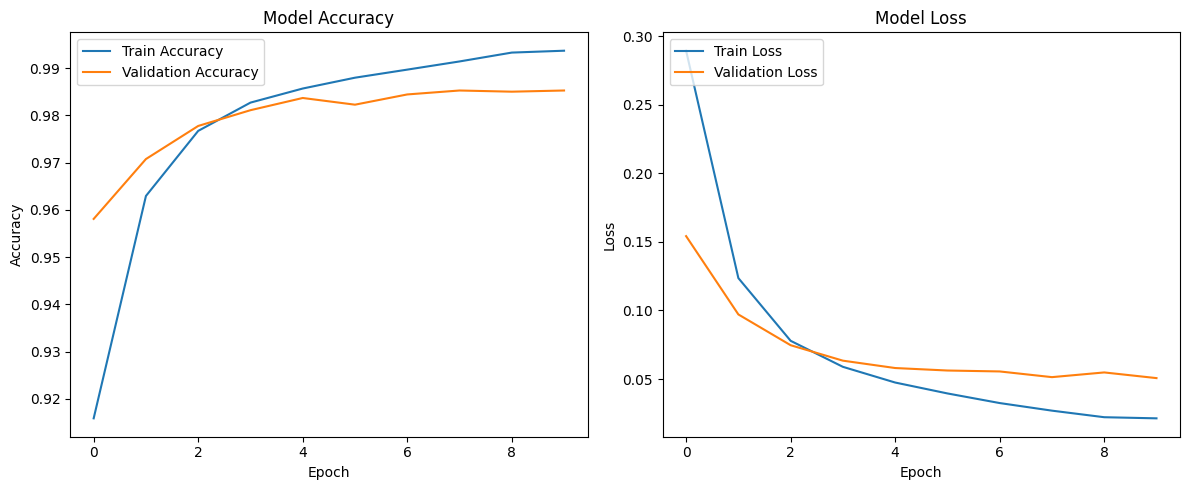

In [18]:
# Plot training & validation accuracy values
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

In [19]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9851 - loss: 0.0468
Test accuracy: 0.9882


In [20]:
# Predictions on test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Confusion Matrix:
 [[ 970    0    0    0    1    0    2    2    4    1]
 [   0 1130    0    1    0    0    3    0    1    0]
 [   0    1 1030    0    1    0    0    0    0    0]
 [   0    0    0 1002    0    6    0    0    2    0]
 [   0    0    1    1  975    0    0    1    0    4]
 [   2    0    0    4    0  879    3    1    3    0]
 [   4    1    1    0    2    2  946    0    2    0]
 [   0    6   10    1    0    0    0 1006    1    4]
 [   3    0    3    3    0    0    1    2  959    3]
 [   1    5    0    3    7    1    0    5    2  985]]


In [21]:
# Classification Report (Precision, Recall, F1 Score)
class_report = classification_report(test_labels, predicted_classes)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [22]:
# Misclassification Rate
miss_class_rate = 1 - test_acc
print(f'Misclassification Rate: {miss_class_rate:.4f}')

Misclassification Rate: 0.0118


ROC AUC Score: 0.9999


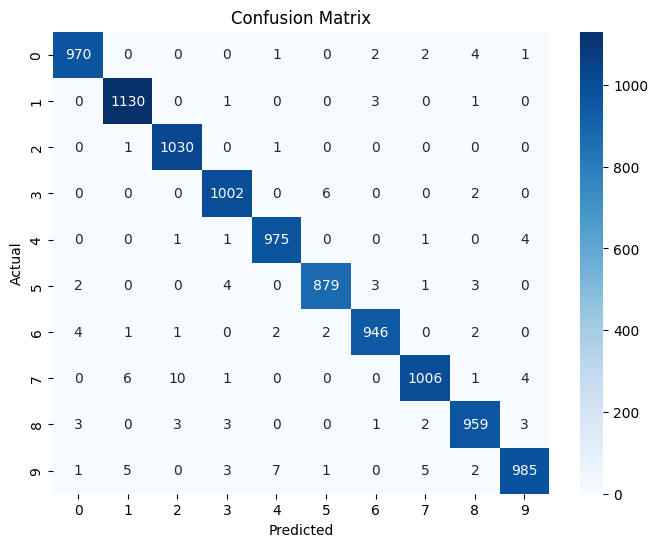

In [23]:
# ROC AUC for each class
auc_roc = roc_auc_score(test_labels_cat, predictions, multi_class="ovr")
print(f'ROC AUC Score: {auc_roc:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

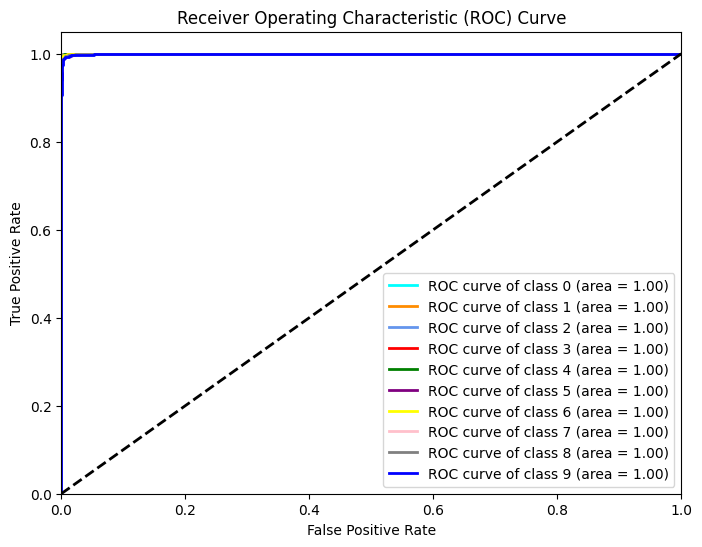

In [ ]:
# AUC-ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'pink', 'gray', 'blue']
for i in range(10):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()